In [1]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os

from blume.process import read, compute, plot_file, exact_m
from blume.run import ModelParameters, Results
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

T_c = 2 / np.log(1 + np.sqrt(2))

# Determine optimal $\chi$

In [2]:
results = Results(varying_param="chi", range=[chi for chi in range(6, 31)])
params = ModelParameters(T_range=[T_c], tol=1e-9, b_c=True, fixed=True, bar=False, max_steps=36)
results.get(params)

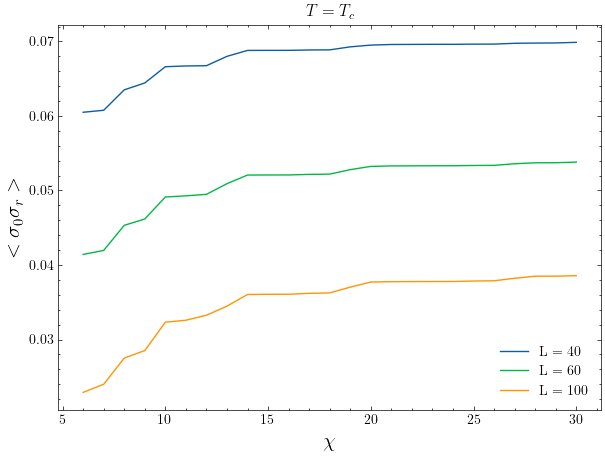

In [2]:
plt.figure(figsize=(7, 5))
for dir in ["06-05 14:06", "06-05 14:09", "06-05 14:10"]:
    mags, corrs = [], []
    chis = [chi for chi in range(6, 31)]
    for chi in chis:
        data = read(dir, f"chi{chi}")
        mags.extend(compute(Prop.m_fixed, data))


    plt.plot(chis, mags, "-", label=f"L = {data['max_steps']+4}")

plt.legend()
plt.xlabel("$\chi$", fontsize=15) 
plt.ylabel("$<\sigma_0 \sigma_r>$", fontsize=15)
plt.locator_params(axis='x', nbins=7)
plt.title("$T = T_c$")

plt.show()

# Phase diagram of finite system

In [8]:
results = Results(varying_param="max_steps", range=[36, 56, 96])
params = ModelParameters(chi = 4, T_range=(2, 2.4), step=0.001, tol=1e-40, b_c=True, fixed=True)
results.get(params)

max_steps=36: 100%|██████████| 400/400 [00:12<00:00, 32.73it/s]


Saving data in folder: '07-05 22:03'
Done 



max_steps=56: 100%|██████████| 400/400 [00:18<00:00, 21.14it/s]


Saving data in folder: '07-05 22:03'
Done 



max_steps=96: 100%|██████████| 400/400 [00:32<00:00, 12.42it/s]


Saving data in folder: '07-05 22:03'
Done 



In [3]:
# Make dir for saving the plots
dir = "07-05 21:19"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

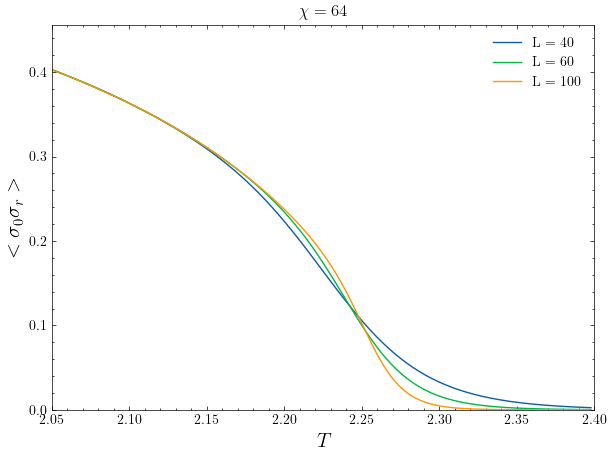

In [5]:
plt.figure(figsize=(7, 5))
T_range = (2, 2.4)
T, m = exact_m(T_range)
#plt.plot(T, m, "k-", label="Exact ($L = \infty$)")

for size in [36, 56, 96]:
    line = plot_file(fn=f"max_steps{size}", range=T_range, prop=Prop.m_fixed, folder=dir)
    line.set_label(f"L = {size+4}")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$< \sigma_0 \sigma_r>$", fontsize=15)
plt.ylim(0)
plt.xlim(2.05, 2.4)
plt.title("$\chi = 64$")
plt.savefig(f"{path_dir}/magnetizations")

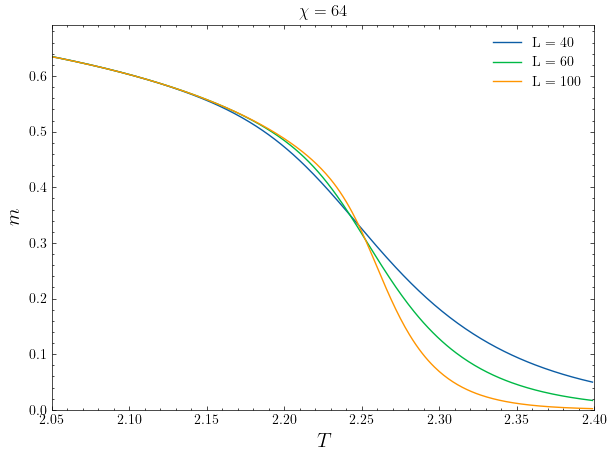

In [6]:
plt.figure(figsize=(7,5))
for size in [36, 56, 96]:
    data = read(dir, f"max_steps{size}")
    mags = [np.sqrt(m) for m in compute(Prop.m_fixed, data)]
    plt.plot(data["temperatures"], mags, label = f"L = {size+4}")
    
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$m$", fontsize=15)
plt.ylim(0)
plt.xlim(2.05, 2.4)
plt.title("$\chi = 64$")
plt.show()

In [5]:
results = Results(varying_param="chi", range=[6, 16, 32])
params = ModelParameters(chi = 32, T_range=(2, 2.4), step=0.01, tol=1e-40, b_c=True, fixed=True, max_steps=76)
results.get(params)

chi=6: 100%|██████████| 40/40 [00:02<00:00, 14.19it/s]


Saving data in folder: '06-05 14:44'
Done 



chi=16:  10%|█         | 4/40 [00:00<00:04,  8.28it/s]


KeyboardInterrupt: 

In [6]:
# Make dir for saving the plots
dir = "06-05 14:19"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

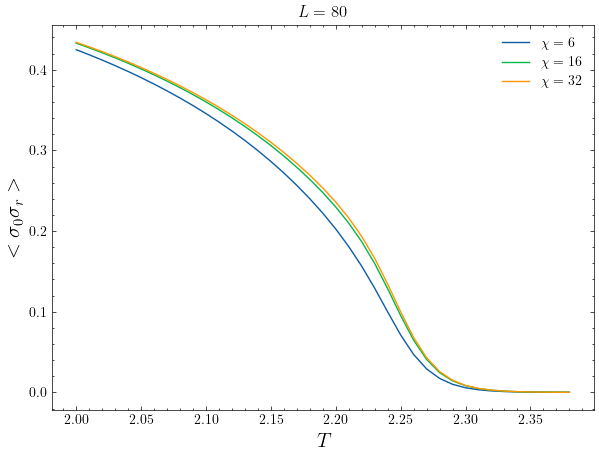

In [7]:
plt.figure(figsize=(7, 5))
T_range = (2, 2.4)
T, m = exact_m(T_range)
#plt.plot(T, m, "k-", label="Exact ($L = \infty$)")

for chi in [6, 16, 32]:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.m_fixed, folder=dir)
    line.set_label(f"$\chi = {chi}$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$< \sigma_0 \sigma_r>$", fontsize=15)
#plt.ylim(0)
plt.title("$L = 80$")
plt.savefig(f"{path_dir}/magnetizations")

# Properties at $T_c$ for L and $\chi=32$

In [30]:
T_c = 2 / np.log(1 + np.sqrt(2))

params = ModelParameters(T_range=[T_c], chi=32, tol=1e-9, b_c=True, fixed=True, bar=False)
result = Results(varying_param="max_steps", range=[L for L in range(10, 500, 20)])
result.get(params)

In [47]:
mags = []
sizes = [size for size in range(10, 500, 20)]
dir = "06-05 15:08"
for size in sizes:
    data = read(folder=dir, fn=f"max_steps{size}")
    mags.extend(compute(Prop.m_fixed, data))

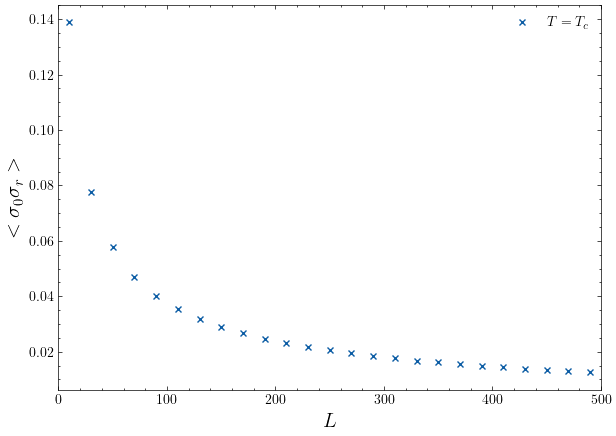

In [48]:
plt.figure(figsize=(7, 5))
plt.plot(sizes, mags, "x", markersize=5, label = f"$T = T_c$")
plt.xlabel(r"$L$", fontsize=15)
plt.ylabel(r"$< \sigma_0 \sigma_r>$", fontsize=15)
plt.legend()
plt.xlim(0, 500)
plt.show()

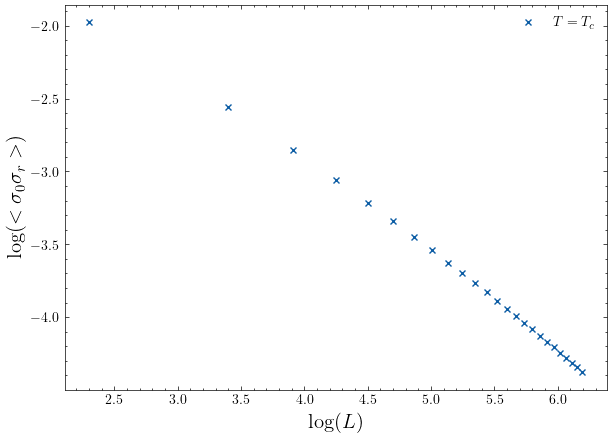

In [49]:
sizes_log = [np.log(L) for L in sizes]
mags_log = [np.log(m) for m in mags]

plt.figure(figsize=(7, 5))
plt.plot(sizes_log, mags_log, "x", markersize=5, label = f"$T = T_c$")
plt.xlabel(r"$\log(L)$", fontsize=15)
plt.ylabel("$\log(< \sigma_0 \sigma_r>)$", fontsize=15)
plt.legend()
plt.show()

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 25
    # variables        = 2
    chi-square         = 0.03228004
    reduced chi-square = 0.00140348
    Akaike info crit   = -162.304550
    Bayesian info crit = -159.866799
    R-squared          = 0.99635923
[[Variables]]
    a:  0.63454520 +/- 0.00799811 (1.26%) (init = 0.5)
    b: -0.39910033 +/- 0.04248328 (10.64%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = +0.9843


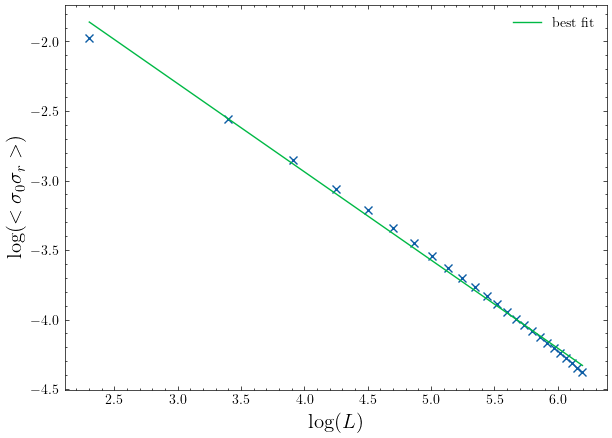

In [50]:
model = Model(lambda x, a, b: -a*x+b)

x, y = sizes_log, mags_log

params = model.make_params(a=0.5, b=0.5)
result = model.fit(y, params, x=x)

print(result.fit_report())

plt.figure(figsize= (7, 5))
plt.plot(x, y, 'x')
plt.plot(x, result.best_fit, '-', label='best fit')
plt.xlabel(r"$\log(L)$", fontsize=15)
plt.ylabel("$\log(< \sigma_0 \sigma_r>)$", fontsize=15)
plt.legend()
plt.show()

In [51]:
print(f"Obtained crit. exp.: {result.params['a'].value} +/- {result.params['a'].stderr}")

Obtained crit. exp.: 1.269090400509474 +/- 0.007998107382468086


In [31]:
import time

model = Model(lambda x, a, b: -a*x+b)
exponents = []
sizes = [L for L in range(10, 500, 20)]

for chi in range(2, 43, 5):
    mags = []
    params = ModelParameters(T_range=[T_c], chi=chi, tol=1e-9, b_c=True, fixed=True, bar=False)
    result = Results(varying_param="max_steps", range=[L for L in range(10, 500, 20)])
    result.get(params)

    for L in sizes:
        data = read(result.dir, f"max_steps{L}")
        mags.extend(compute(Prop.m_fixed, data))

    log_sizes = [np.log(L) for L in sizes]
    log_mags = [np.log(m) for m in mags]

    params = model.make_params(a=0.5, b=0.5)
    result = model.fit(log_mags, params, x=log_sizes)
    exponents.append((result.params['a'].value, result.params['a'].stderr))

    time.sleep(60)

KeyboardInterrupt: 

In [41]:
exponents, errors = zip(*exponents)

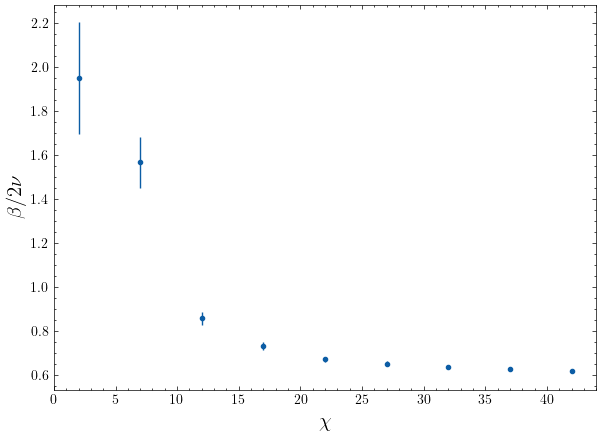

In [42]:
chis = [chi for chi in range(2, 43, 5)]
plt.figure(figsize=(7, 5))
plt.errorbar(chis,exponents, yerr = errors, fmt="o", markersize=3)
plt.ylabel(r"$\beta / 2\nu $", fontsize=15)
plt.xlabel(r"$\chi$", fontsize=15)
plt.show()

In [46]:
print(f"Obtained crit. exp.: {2* exponents[-1]} +/- {errors[-1]}")

Obtained crit. exp.: 1.2334723737922946 +/- 0.006271775335878402
